# Kaggle上的貓狗大戰分類題

In [1]:
# 預防錯誤： OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# 定義各類資料路徑
original_dataset_dir = '/Users/ken/Downloads/dogs-vs-cats/train/'
base_dir = '/Users/ken/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test') 

train_cats_dir = os.path.join(train_dir, 'cats') 
train_dogs_dir = os.path.join(train_dir, 'dogs') 
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats') 
test_dogs_dir = os.path.join(test_dir, 'dogs') 

In [ ]:
# 資料整理，從解開的訓練集中，用狗猫各1000張做訓練集，各500張做驗證集，各500張做測試集
# 照片用cat.NUMBER.jpg、dog.NUMBER.jpg命名，NUMBER from 0 to 12499

import os, shutil

os.mkdir(base_dir)

# 在新的資料存放目錄下新增三個資料夾：train、validation、test

os.mkdir(train_dir) 
os.mkdir(validation_dir) 
os.mkdir(test_dir)

# 在上述三個資料集目錄下再新增dogs、cats兩個資料夾
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

os.mkdir(validation_cats_dir) 
os.mkdir(validation_dogs_dir)

os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

# 複製1000張貓狗照做訓練集
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname) 
  dst = os.path.join(train_cats_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname) 
  dst = os.path.join(train_dogs_dir, fname) 
  shutil.copyfile(src, dst)

# 複製500張貓狗照做驗證集
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)] 
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname) 
  dst = os.path.join(validation_cats_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)] 
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname) 
  dst = os.path.join(validation_dogs_dir, fname) 
  shutil.copyfile(src, dst)

# 複製500張貓狗照做測試集
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)] 
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname) 
  dst = os.path.join(test_cats_dir, fname) 
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)] 
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname) 
  dst = os.path.join(test_dogs_dir, fname) 
  shutil.copyfile(src, dst)

In [ ]:
# 定義網路

from keras import layers 
from keras import models

# 照片大小並不一致，隨意選兩張，有375x299、500x374，還有更多種Size。這裡任意以150x150做為輸入照片大小，訓練前要先resize
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

# 編繹網路 

from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

### flow_from_directory參數說明，參考[文件](https://keras-cn.readthedocs.io/en/latest/preprocessing/image/)
- directory: 目标文件夹路径,对于每一个类,该文件夹都要包含一个子文件夹.子文件夹中任何JPG、PNG、BNP、PPM的图片都会被生成器使用
- target_size: 整数tuple,默认为(256, 256). 图像将被resize成该尺寸
- color_mode: 颜色模式,为"grayscale","rgb"之一,默认为"rgb".代表这些图片是否会被转换为单通道或三通道的图片.
- classes: 可选参数,为子文件夹的列表,如['dogs','cats']默认为None. 若未提供,则该类别列表将从directory下的子文件夹名称/结构自动推断。每一个子文件夹都会被认为是一个新的类。(类别的顺序将按照字母表顺序映射到标签值)。通过属性class_indices可获得文件夹名与类的序号的对应字典。
- class_mode: "categorical", "binary", "sparse"或None之一. 默认为"categorical. 该参数决定了返回的标签数组的形式, "categorical"会返回2D的one-hot编码标签,"binary"返回1D的二值标签."sparse"返回1D的整数标签,如果为None则不返回任何标签, 生成器将仅仅生成batch数据, 这种情况在使用model.predict_generator()和model.evaluate_generator()等函数时会用到.
- batch_size: batch数据的大小,默认32
- shuffle: 是否打乱数据,默认为True
- seed: 可选参数,打乱数据和进行变换时的随机数种子
- save_to_dir: None或字符串，该参数能让你将提升后的图片保存起来，用以可视化
- save_prefix：字符串，保存提升后图片时使用的前缀, 仅当设置了save_to_dir时生效
- save_format："png"或"jpeg"之一，指定保存图片的数据格式,默认"jpeg"
- flollow_links: 是否访问子文件夹中的软链接

In [ ]:
# 讀取JPEG檔, 轉成RGB值後做Normalization，並resize成150x150

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
  target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
  target_size=(150, 150), batch_size=20, class_mode='binary')

In [ ]:
# 訓練模型。這裡改用fit_generator，使用generator做資料來源

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

In [ ]:
# 儲存訓練好的模型

model.save('cats_and_dogs_small_1.h5')

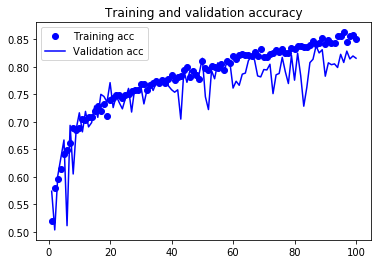

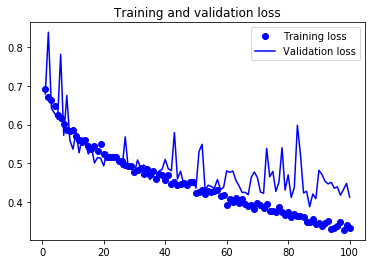

In [9]:
# 把訓練期間，損失值與準確度的變化畫出來

import matplotlib.pyplot as plt

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

In [ ]:
# Data Augmentation

datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest')

In [ ]:
# Display some augmented images

import matplotlib.pyplot as plt
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0 
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i) 
  imgplot = plt.imshow(image.array_to_img(batch[0])) 
  i += 1 
  if i % 4 == 0:
    break
    
plt.show()    

In [4]:
# 重新定義模網路，這次加上Dropout

from keras import layers 
from keras import models
from keras import optimizers

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',

optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# 編繹網路
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [6]:
# 加上data augmentation與dropout後，重新訓練模型

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=32, 
                                                        class_mode='binary')

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=100, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 127s 1s/step - loss: 0.6914 - acc: 0.5203 - val_loss: 0.6789 - val_acc: 0.5736
Epoch 2/100
100/100 [==============================] - 113s 1s/step - loss: 0.6721 - acc: 0.5803 - val_loss: 0.8377 - val_acc: 0.5032
Epoch 3/100
100/100 [==============================] - 115s 1s/step - loss: 0.6633 - acc: 0.5947 - val_loss: 0.6415 - val_acc: 0.6022
Epoch 4/100
100/100 [==============================] - 111s 1s/step - loss: 0.6491 - acc: 0.6119 - val_loss: 0.6293 - val_acc: 0.6347
Epoch 5/100
100/100 [==============================] - 111s 1s/step - loss: 0.6249 - acc: 0.6419 - val_loss: 0.6137 - val_acc: 0.6669
Epoch 6/100
100/100 [==============================] - 110s 1s/step - loss: 0.6192 - acc: 0.6472 - val_loss: 0.7809 - val_acc: 0.5110
Epoch 7/100
100/100 [==============================] - 110s 1s/s

100/100 [==============================] - 111s 1s/step - loss: 0.4176 - acc: 0.8072 - val_loss: 0.4386 - val_acc: 0.8067
Epoch 60/100
100/100 [==============================] - 113s 1s/step - loss: 0.3928 - acc: 0.8191 - val_loss: 0.4808 - val_acc: 0.7614
Epoch 61/100
100/100 [==============================] - 112s 1s/step - loss: 0.4101 - acc: 0.8144 - val_loss: 0.4770 - val_acc: 0.7738
Epoch 62/100
100/100 [==============================] - 111s 1s/step - loss: 0.4002 - acc: 0.8216 - val_loss: 0.4803 - val_acc: 0.7665
Epoch 63/100
100/100 [==============================] - 111s 1s/step - loss: 0.4098 - acc: 0.8247 - val_loss: 0.4565 - val_acc: 0.7867
Epoch 64/100
100/100 [==============================] - 112s 1s/step - loss: 0.3985 - acc: 0.8219 - val_loss: 0.4425 - val_acc: 0.7887
Epoch 65/100
100/100 [==============================] - 111s 1s/step - loss: 0.4097 - acc: 0.8219 - val_loss: 0.4254 - val_acc: 0.8115
Epoch 66/100
100/100 [==============================] - 111s 1s/step

In [7]:
model.save('cats_and_dogs_small_2.h5')